In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Upload the dataset
from google.colab import files
uploaded = files.upload()

Saving 7)kmeans.csv to 7)kmeans.csv


In [3]:

df = pd.read_csv(next(iter(uploaded)))
df.head(20)

,CustomerID,Age,Annual_Income (k$),Spending_Score (1-100)
0,1,20,15,50
1,2,21,16,81
2,3,22,17,6
3,4,23,18,77
4,5,24,19,40
5,6,25,20,66
6,7,26,21,80
7,8,27,22,20
8,9,28,23,95
9,10,29,24,5


In [4]:
# Step 2: Preprocess the data
df.dropna(inplace=True)  # Remove rows with null values
df.reset_index(drop=True, inplace=True)

In [5]:
# Selecting the features for clustering
X = df[['Annual_Income (k$)', 'Spending_Score (1-100)']].values

In [6]:
# Step 3: Implement K-Means from scratch
class KMeans:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        np.random.seed(42)
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

        for _ in range(self.max_iters):
            # Assign clusters
            clusters = self._assign_clusters(X)
            new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(self.k)])

            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

        self.labels = clusters

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

In [7]:
# Step 4: Apply K-Means Clustering
kmeans = KMeans(k=3)
kmeans.fit(X)


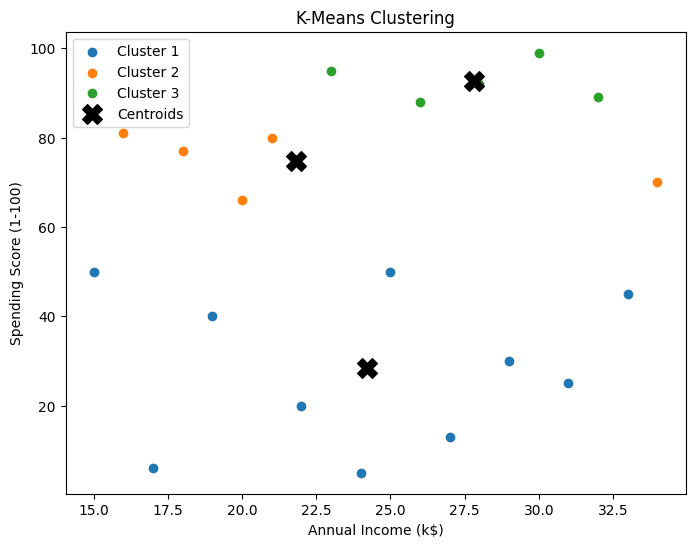

In [8]:
# Step 5: Visualize Clusters
plt.figure(figsize=(8, 6))
for i in range(kmeans.k):
    plt.scatter(X[kmeans.labels == i, 0], X[kmeans.labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], color='black', marker='X', s=200, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()